In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()


4423680/4422102 [==============================] - 1s 0us/step


In [4]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
#Exploring the data
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


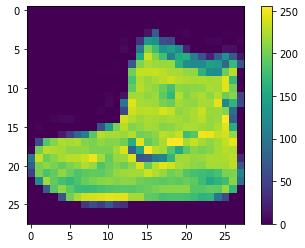

In [9]:
#preprocessing data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images,test_images=train_images/255.0,test_images/255.0

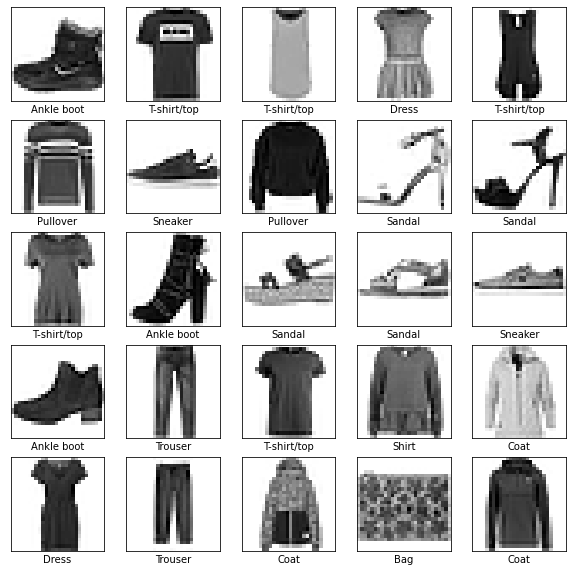

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
#Building a model

#1.Set up the layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
#compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
#training the model

model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5018 - accuracy: 0.8238
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3785 - accuracy: 0.8626
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3382 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3134 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 2s 986us/step - loss: 0.2953 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 2s 974us/step - loss: 0.2799 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 2s 917us/step - loss: 0.2674 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 2s 961us/step - loss: 0.2560 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 2s 985us/step - loss: 0.2480 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 2s 975us/step -

In [15]:
#evaluating accuracy
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('Test accuracy',test_acc)

313/313 - 0s - loss: 0.3352 - accuracy: 0.8809
Test accuracy 0.8809000253677368


In [17]:
#To make predictions

probability_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions=probability_model.predict(test_images)

In [19]:
print(predictions[0])

[1.5735054e-08 7.0240197e-10 4.4597678e-10 4.4800226e-11 2.7361526e-09
 2.3490105e-02 6.3328803e-10 1.4173691e-03 3.4309114e-08 9.7509253e-01]


In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

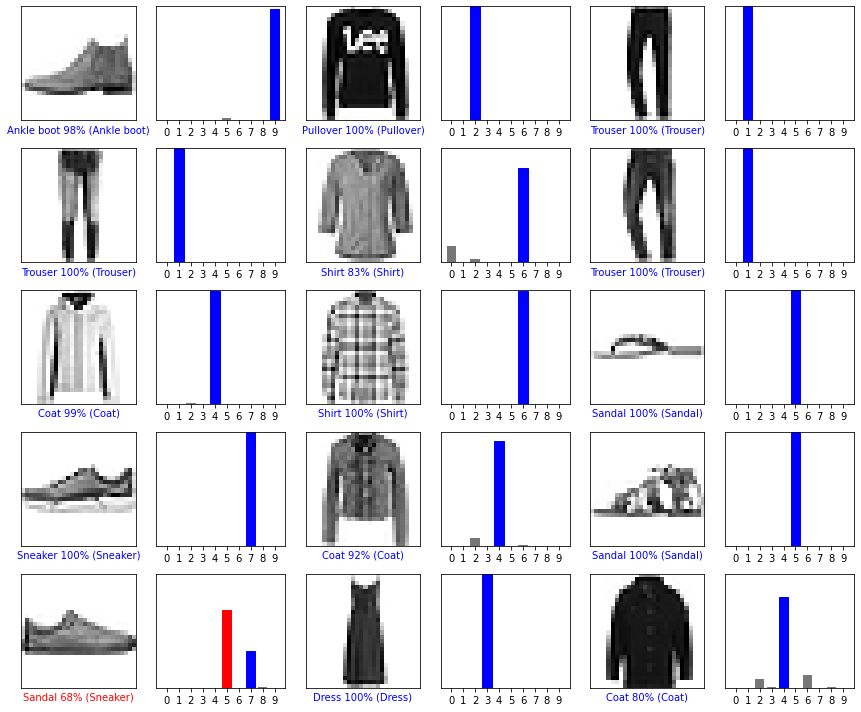

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [24]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = probability_model.predict(img)

print(predictions_single)

(28, 28)
(1, 28, 28)
[[3.2721618e-05 2.9542823e-13 9.9934310e-01 9.0409937e-09 4.5365156e-04
  2.2637817e-11 1.7053094e-04 8.1818021e-15 1.0559981e-11 8.4470977e-14]]


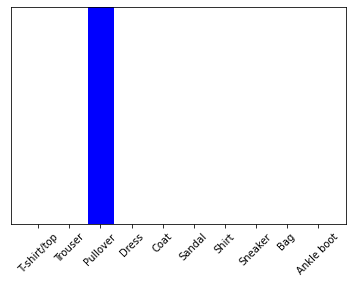

In [25]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [26]:
np.argmax(predictions_single[0])

2